In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!pip install kmodes

In [21]:
from kmodes.kprototypes import KPrototypes

In [22]:
df = pd.read_csv('data_cat2.csv',encoding='euc-kr')
df_based = df.copy()
#year, cctv, light 모두 범주형 변수로 처리
df['year']=df['year'].astype('category')
df['light']=df['light'].astype('category')
df['cctv']=df['cctv'].astype('category')
df=df.drop(columns=['gid'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    1050 non-null   category
 1   cctv    1050 non-null   category
 2   light   1050 non-null   category
 3   log_pa  1050 non-null   float64 
 4   ep      1050 non-null   float64 
 5   fp      1050 non-null   float64 
 6   yp      1050 non-null   float64 
 7   log_nb  1050 non-null   float64 
dtypes: category(3), float64(5)
memory usage: 44.6 KB


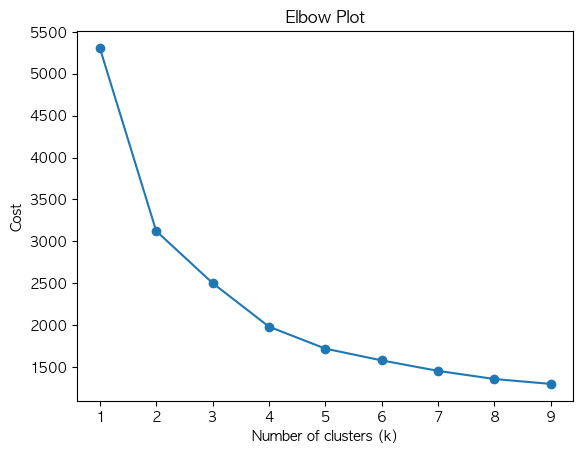

In [23]:
import random
random.seed(312)  # 랜덤 시드를 312로 설정

X=df
categorical_features = [0,1,2]  # 범주형 변수의 인덱스
# 엘보우 플롯 그리기
costs = []
k_values = range(1, 10)

for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Cao')
    kproto.fit_predict(X, categorical=categorical_features)
    costs.append(kproto.cost_)

# 그래프 그리기
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Plot')
plt.show()

## Silhouette

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

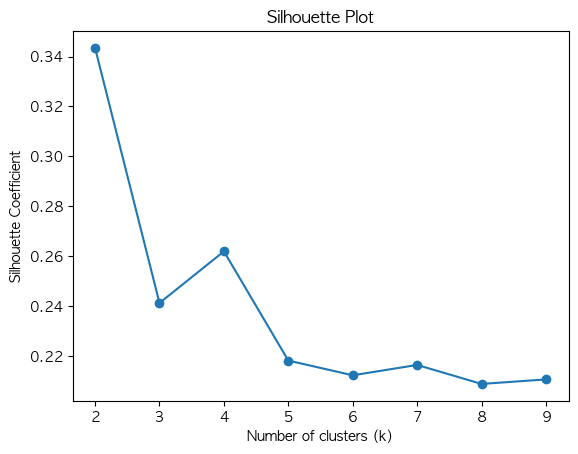

In [14]:
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Cao')
    labels = kproto.fit_predict(X, categorical=categorical_features)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# 그래프 그리기
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Plot')
plt.show()

In [24]:
# 모델 학습
kproto = KPrototypes(n_clusters=3, init='Cao')
labels = kproto.fit_predict(X, categorical=categorical_features)

# 군집별 데이터 포인트 수 계산
cluster_counts = np.bincount(labels)

# 결과 출력
for cluster, count in enumerate(cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 399 data points
Cluster 1: 265 data points
Cluster 2: 386 data points


In [16]:
# 모델 학습
kproto = KPrototypes(n_clusters=4, init='Cao')
labels = kproto.fit_predict(X, categorical=categorical_features)

# 군집별 데이터 포인트 수 계산
cluster_counts = np.bincount(labels)

# 결과 출력
for cluster, count in enumerate(cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 173 data points
Cluster 1: 416 data points
Cluster 2: 113 data points
Cluster 3: 348 data points


In [17]:
# 모델 학습
kproto = KPrototypes(n_clusters=5, init='Cao')
labels = kproto.fit_predict(X, categorical=categorical_features)

# 군집별 데이터 포인트 수 계산
cluster_counts = np.bincount(labels)

# 결과 출력
for cluster, count in enumerate(cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 109 data points
Cluster 1: 241 data points
Cluster 2: 299 data points
Cluster 3: 228 data points
Cluster 4: 173 data points


In [18]:
# 모델 학습
kproto = KPrototypes(n_clusters=6, init='Cao')
labels = kproto.fit_predict(X, categorical=categorical_features)

# 군집별 데이터 포인트 수 계산
cluster_counts = np.bincount(labels)

# 결과 출력
for cluster, count in enumerate(cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

Cluster 0: 190 data points
Cluster 1: 210 data points
Cluster 2: 203 data points
Cluster 3: 105 data points
Cluster 4: 195 data points
Cluster 5: 147 data points


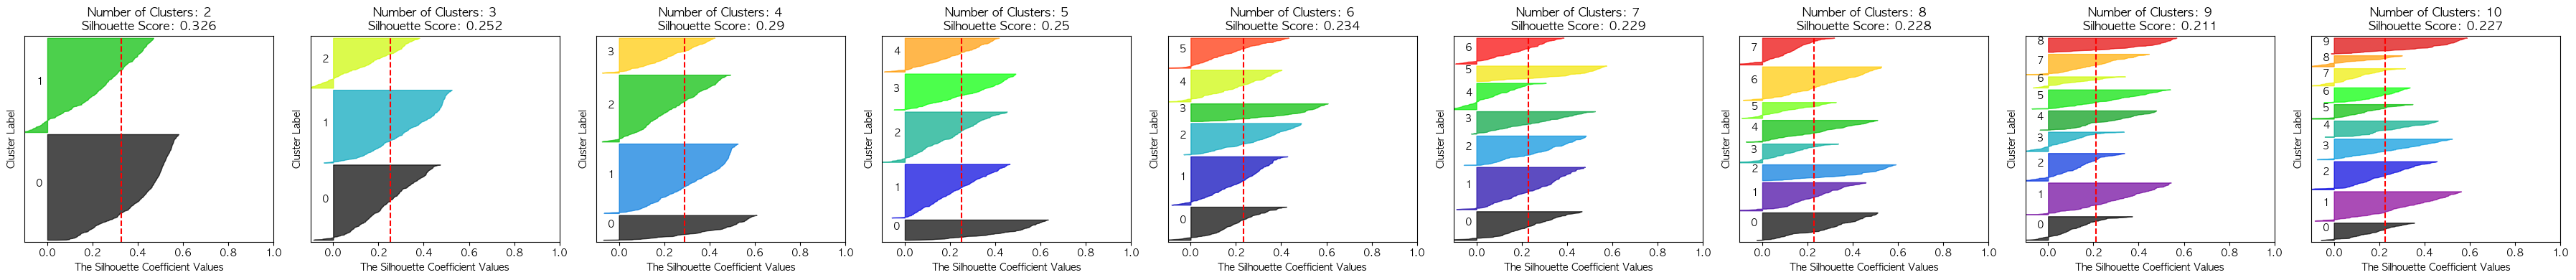

In [25]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from kmodes.kprototypes import KPrototypes

def visualize_silhouette(cluster_lists, X_num, X_cat):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        kproto = KPrototypes(n_clusters=n_cluster, init='Cao')
        labels = kproto.fit_predict(X_num, categorical=X_cat)

        sil_avg = silhouette_score(X_num, labels)
        sil_values = silhouette_samples(X_num, labels)

        y_lower = 10
        axs[ind].set_title('Number of Clusters: '+ str(n_cluster)+'\n' \
                          'Silhouette Score: ' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel("The Silhouette Coefficient Values")
        axs[ind].set_ylabel("Cluster Label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_num) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(
                y=np.arange(y_lower, y_upper),
                x1=0,
                x2=ith_cluster_sil_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7
            )
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# 시각화 함수 호출
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df, categorical_features)
plt.tight_layout()
plt.show()

In [14]:
# 모델 학습
kproto = KPrototypes(n_clusters=4, init='Cao')
labels = kproto.fit_predict(X, categorical=categorical_features)

df5 = df.copy()
df5['gid']=df_based['gid']
df5['label']=labels
df5.head()

,year,cctv,light,log_pa,ep,fp,yp,log_nb,gid,label
0,0,0,0,1.795010,-0.316027,-0.331228,-0.323077,-1.270062,ㅼ궗58ab30ba,3
1,0,0,0,1.742831,-0.343115,-0.341053,-0.323077,-1.270062,ㅼ궗58bb30ab,3
2,0,0,0,1.742831,-0.343115,-0.341053,-0.323077,-1.270062,ㅼ궗59aa30aa,3
3,0,0,0,1.742831,-0.343115,-0.341053,-0.323077,-1.029431,ㅼ궗59aa30ab,3
4,0,1,1,1.612460,-0.343115,-0.341053,-0.323077,-1.029431,ㅼ궗59ab30aa,3


In [15]:
df5.to_csv('k_proto_cat4.csv',encoding='euc-kr',index=False)